In [39]:
import numpy as np
import sklearn as sk
import os
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
import requests
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import TruncatedSVD
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering

In [2]:
marketing_df=pd.read_csv('marketing_campaign.csv', delimiter='\t')
marketing_df
#will helped me with the delimiter part since I was a bit lost as neither dataset was 'working'

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# putting this one as a comment since it's super long and I'm just trying to see if there are any null values(there are not)
# marketing_df['Year_Birth'].value_counts()

In [4]:
marketing_df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [5]:
marketing_df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [6]:
marketing_df['Income'].value_counts()

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64

In [7]:
marketing_df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [8]:
marketing_df['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [9]:
marketing_df['Dt_Customer'].value_counts()

Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64

In [10]:
marketing_df['Recency'].value_counts()

Recency
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64

In [11]:
marketing_df['MntWines'].value_counts()

MntWines
2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: count, Length: 776, dtype: int64

In [12]:
marketing_df['NumWebVisitsMonth'].value_counts()

NumWebVisitsMonth
7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: count, dtype: int64

In [13]:
marketing_df['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

In [14]:
marketing_df['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

In [15]:
marketing_df['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [16]:
marketing_df['AcceptedCmp4'].value_counts()

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

In [17]:
marketing_df['AcceptedCmp5'].value_counts()

AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

In [18]:
marketing_df['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [19]:
marketing_df['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [20]:
marketing_df['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [21]:
marketing_df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

Through this we see that there are no null values meaning I just have to change a few columns so they are easier to work with (marital status, education, and date) 

In [22]:
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'], format='%d-%m-%Y')
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'])

marketing_df['year'] = marketing_df['Dt_Customer'].dt.year
marketing_df['month'] = marketing_df['Dt_Customer'].dt.month
marketing_df['day'] = marketing_df['Dt_Customer'].dt.day

reference_date = pd.to_datetime('30-07-2012', format='%d-%m-%Y')
marketing_df['days_difference'] = (marketing_df['Dt_Customer'] - reference_date).dt.days
# made columns for the month, day, and year in case certain months or times of the months seemed to have big impacts but also 
# took the earliest date and based all dates off of that, July 30, 2012 should be 0; July 31, 2012 should be 1; August 1, 2012 should be 2 and etc.
# called days_difference (days since July 30, 2012)

In [23]:
#no clue what absurd and yolo mean in this case so I'm just going to put them as a 2
marketing_df['Marital_Status']=marketing_df['Marital_Status'].map(lambda x: 1 if 'Married' in x
                                                                  else 2 if 'Together' in x
                                                                  else 3 if 'Divorced' in x
                                                                  else 4 if 'Widow' in x
                                                                  else 5 if 'Single' or 'Alone' in x
                                                                  else 2)

In [24]:
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day,days_difference
0,5524,1957,Graduation,5,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,2012,9,4,36
1,2174,1954,Graduation,5,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2014,3,8,586
2,4141,1965,Graduation,2,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2013,8,21,387
3,6182,1984,Graduation,2,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,2014,2,10,560
4,5324,1981,PhD,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2014,1,19,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,2013,6,13,318
2236,4001,1946,PhD,2,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,2014,6,10,680
2237,7270,1981,Graduation,3,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,2014,1,25,544
2238,8235,1956,Master,2,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,2014,1,24,543


In [25]:
marketing_df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [26]:
marketing_df['Education']=marketing_df['Education'].map(lambda x: 1 if 'PhD' in x
                                                        else 2 if 'Master' in x
                                                        else 3 if 'Graduation' in x
                                                        else 4 if '2n Cycle' in x
                                                        else 5)

In [27]:
marketing_df.drop('Dt_Customer', axis=1, inplace=True)

In [28]:
marketing_df['Income'].median()

51381.5

In [29]:
nan_index = marketing_df.index[marketing_df.isna().any(axis=1)].tolist()[0] 
nan_column = marketing_df.columns[marketing_df.isna().any()].tolist()[0]   
replacement_value = 51381
marketing_df['Income'].fillna(replacement_value, inplace=True)

C:\Users\brady\AppData\Local\Temp\ipykernel_6564\681502300.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_df['Income'].fillna(replacement_value, inplace=True)


In [30]:
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day,days_difference
0,5524,1957,3,5,58138.0,0,0,58,635,88,...,0,0,0,3,11,1,2012,9,4,36
1,2174,1954,3,5,46344.0,1,1,38,11,1,...,0,0,0,3,11,0,2014,3,8,586
2,4141,1965,3,2,71613.0,0,0,26,426,49,...,0,0,0,3,11,0,2013,8,21,387
3,6182,1984,3,2,26646.0,1,0,26,11,4,...,0,0,0,3,11,0,2014,2,10,560
4,5324,1981,1,1,58293.0,1,0,94,173,43,...,0,0,0,3,11,0,2014,1,19,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,46,709,43,...,0,0,0,3,11,0,2013,6,13,318
2236,4001,1946,1,2,64014.0,2,1,56,406,0,...,1,0,0,3,11,0,2014,6,10,680
2237,7270,1981,3,3,56981.0,0,0,91,908,48,...,0,0,0,3,11,0,2014,1,25,544
2238,8235,1956,2,2,69245.0,0,1,8,428,30,...,0,0,0,3,11,0,2014,1,24,543


In [31]:
X = marketing_df.drop('Response', axis = 1)
y = marketing_df['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =32)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))
print(knn.score(X_test, y_test))

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=32)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
marketing_df['kmeans_cluster'] = kmeans.labels_
print(marketing_df['kmeans_cluster'].value_counts())

k = 3  # Number of clusters
kmeans_model = KMeans(n_clusters=k, random_state=42)

# Step 5: Fit the model to your data
kmeans_model.fit(marketing_df)

# Step 6: Retrieve the cluster labels
cluster_labels = kmeans_model.labels_

# Step 7: Analyze the clusters
# For example, you can add cluster labels to your dataframe
marketing_df['Cluster'] = cluster_labels

# You can also analyze the centroids of the clusters
centroids = kmeans_model.cluster_centers_
print("Centroids:")
print(centroids)

# Perform hierarchical clustering
# Using Ward's method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

n_clusters_hierarchical = 4
kmeans_hierarchical = KMeans(n_clusters=n_clusters_hierarchical, init='k-means++', random_state=42)
kmeans_hierarchical.fit(X_scaled)
data['hierarchical_cluster'] = kmeans_hierarchical.labels_

In [34]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)

    # Distortion is the average of the squared
    # distance from the cluster center
    # to the data points in Euclidean space
    # Euclidean space = standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_,
                                  'euclidean')
    distortion = sum(np.min(distance,axis =1))/X.shape[0]
    distortions.append(distortion)

    #inertia is calculated by measuring the distance between
    # each data point and the centroid and summing
    # the squared across the cluster. A good model
    # is one with low intertia or distortion
    # AND a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

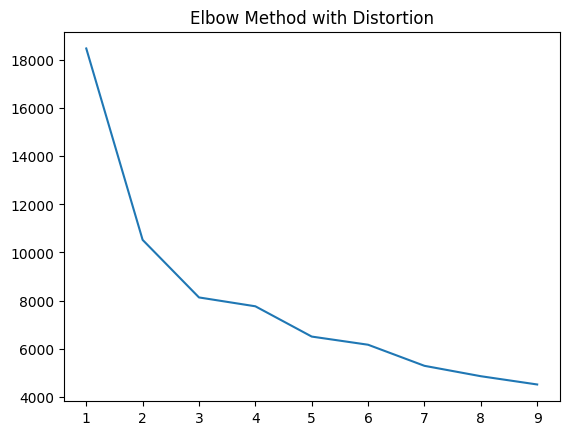

In [38]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

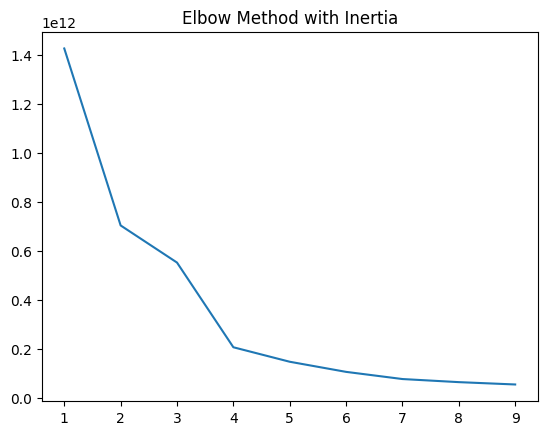

In [37]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

I looked at all of the data when drawing my conclusions but I'd say we should porbably use 4 clusters. When we look at the elbow method with distortion it looks like 3 is the elbow point but when look at the elbow method with inertia it looks like 4 is the elbow point. I'm not 100% sure of this but I believe we should probably go for the higher amount in this case.

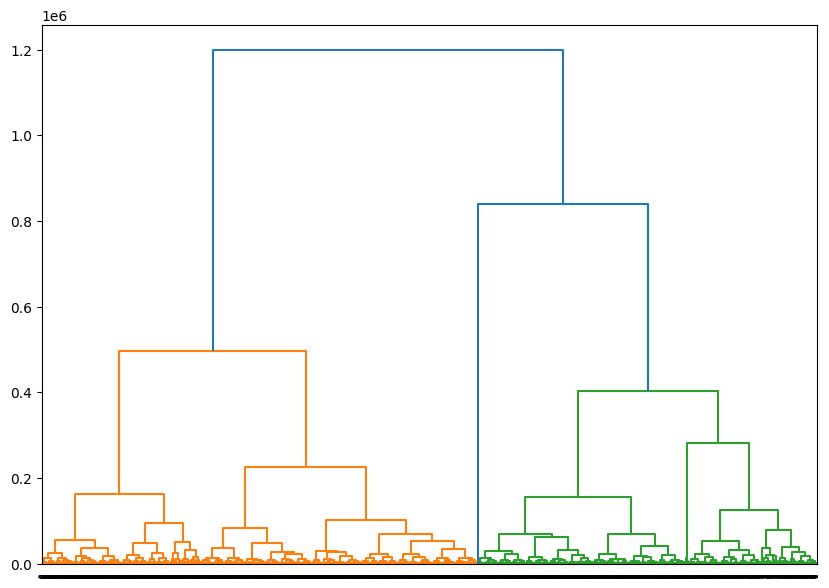

In [40]:
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels= list(y))